# Обработка и анализ признаков

Возьмите датасет вашего варианта из лабораторной работы № 1. Если вы раньше применяли бинаризацию целевого признака, то сейчас этого делать не нужно. Добавьте для тестирования искусственно сгенерированный признак random с рандомными вещественными значениями.

## Корреляции

Нарисуйте матрицу корреляций признаков. Вам поможет код:
```
corr = data.corr()
sns.heatmap(corr)
```
Нарисуйте 4 графика рассеяния: два на осях самых коррелированных пар признаков и два - для некоррелированных пар. Скопируйте их в отчет, разместив рядом друг с другом. Чем коррелированные графики отличаются от некореллированных?

С какими признаками сильнее всего коррелирует целевой?


## Важность признаков

Сравните разные подходы к определению "важных" признаков. Для этого постройте столбцовую диаграмму, в которой по оси х будут отмечены названия признаков. Каждому признаку соответсвует набор столбцов разного цвета, высота которых отражает важность в смысле разных определений. Нормируйте все важности одного типа на максимальную важность этого типа. Если признаков больше 7, разбейте диаграмму на несколько рисунков по 7 признаков в каждом. 

Подходы к определению важности признака f:

* качество предсказания целевого признака моделью ExtraTrees по одному признаку f 

* Свойство feature_importances_ модели ExtraTrees, обученной **на всех признаках** одновременно

* Модуль коэффициента линейной модели (признаки должны быть нормированными!)

* Модуль коэффициента корреляции с целевым признаком

* Количество взаимной информации в f и целевом признаке (используйте mutual_info_regression для задачи регрессии и mutual_info_classif для задачи классификации)

Код для построения столбцовой диаграммы по датафрейму из важностей (см. лаб. работу №1):
```
importance = importance.melt(id_vars=['name'], value_vars=['quality', 'ExtraTrees', 'linear', 'corr', 'MI'])
sns.barplot(x='value', y='name', hue='variable', data=importance)
```

Какой самый важный признак? Какая важность оказалась у признака random?

## Главные компоненты

1) Примените метод главных компонент к нормированной матрице объектов-признаков (sklearn.decomposition.PCA). Спроектируйте датасет на две главные компоненты (fit_transform) и постройте в плоскости этих компонент график рассеяния датасета, используя в качестве цвета значения целевого признака.  

2) Выведите координаты главной компоненты и соответсвующие им названия признаков (свойство components_). Анализируя вывод, выясните какие признаки меняются "в унисон" и соответствует ли это матрице корреляций. 

3) Примените PCA в качестве генеративной модели. Эффектнее всего такая генерация выглядит для датасета с изображениями, но мы попробуем применить аналогичную операцию и для наших данных. Для этого на графике рассеяния выберите какие-нибудь два набора значений главных компонент в областях разных классов (разных значений целевого признака - для регрессии). Причем выберите так, чтобы этим значениям не соответствовала никакая точка из обучающей выборки. После этого примените обратную трансформацию и найдите признаки, соответсвующие этим двум наборам. Запишите в отчете эти два набора в таблицу вместе с 10 другими случайными объектами. Насколько эти два искусственно построенных объекта реальны? Сможете ли вы отличить реальные объекты от искусственно сгенерированных?

4) Найдите две главные компоненты методом PLS (sklearn.cross_decomposition.PLSRegression, StandardScaler использовать не нужно - он уже встроен в PLSRegression). Нарисуйте аналогичный п.1 график рассеяния и поместите оба графика в отчете рядом друг с другом

Полезный код:

```
pca_transformer = make_pipeline(StandardScaler(), PCA(n_components=2))
pca_features = pca_transformer.fit_transform(data.loc[:, data.columns != label])
```

## 1. Корреляции

In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [233]:
data = pd.read_csv('russian_demography.csv')
data.dropna(inplace=True) # Убираем строчки с каким-то пустынми значениями по столбцам
data.tail()

,year,region,npg,birth_rate,death_rate,gdw,urbanization
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.0
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.0
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.5
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.7
2379,2017,Yaroslavl Oblast,-4.7,10.5,15.2,82.61,81.7


In [235]:
data['random'] = np.random.rand(len(data))
data.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization,random
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42,0.579755
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07,0.693873
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37,0.489079
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63,0.810889
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01,0.210946


,year,npg,birth_rate,death_rate,gdw,urbanization,random
year,1.000000,0.109614,0.266377,0.057290,-0.294749,0.008144,0.004246
npg,0.109614,1.000000,0.891536,-0.906698,-0.140840,-0.323101,0.029496
birth_rate,0.266377,0.891536,1.000000,-0.618059,-0.087246,-0.418940,0.026738
death_rate,0.057290,-0.906698,-0.618059,1.000000,0.159904,0.172676,-0.026268
gdw,-0.294749,-0.140840,-0.087246,0.159904,1.000000,-0.345280,-0.002222
urbanization,0.008144,-0.323101,-0.418940,0.172676,-0.345280,1.000000,-0.006660
random,0.004246,0.029496,0.026738,-0.026268,-0.002222,-0.006660,1.000000


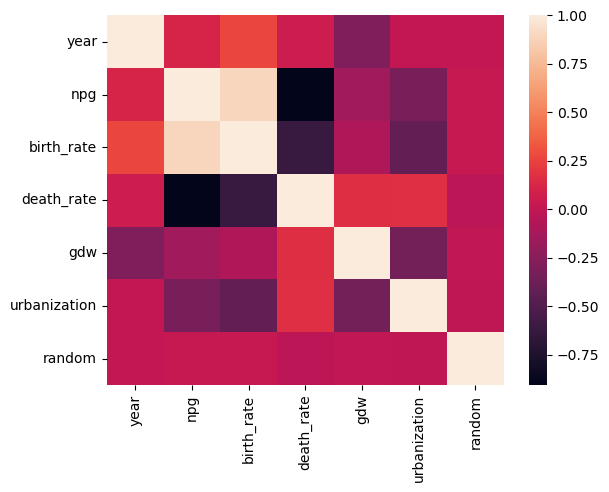

In [237]:
data = data.select_dtypes(include=[np.number])
corr = data.corr()
sns.heatmap(corr)
corr

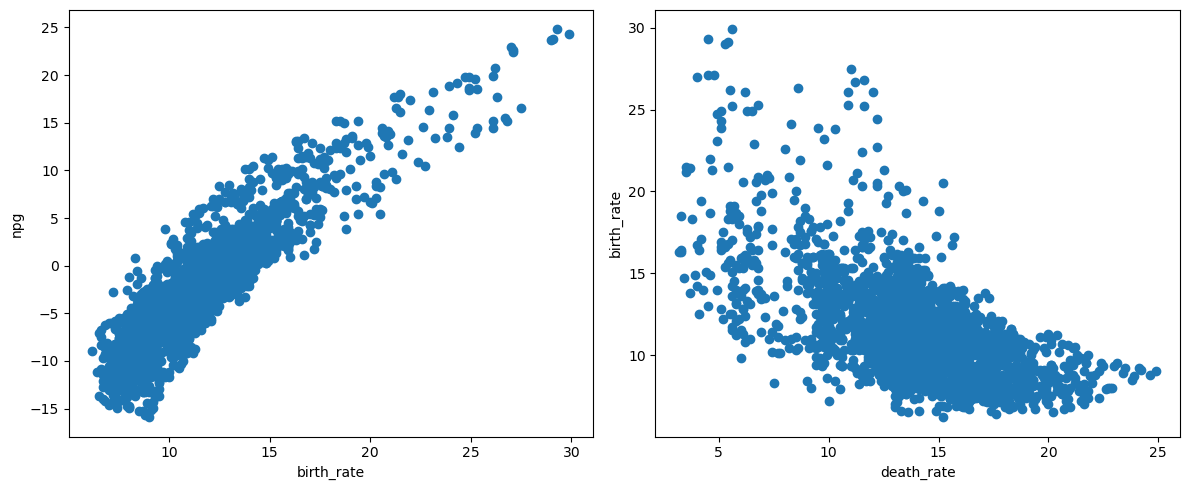

In [238]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['birth_rate'], data['npg']) # естественный прирост населения на 1000 человек
plt.xlabel('birth_rate')
plt.ylabel('npg')

plt.subplot(1, 2, 2)
plt.scatter(data['death_rate'], data['birth_rate'])
plt.xlabel('death_rate')
plt.ylabel('birth_rate')
plt.tight_layout()

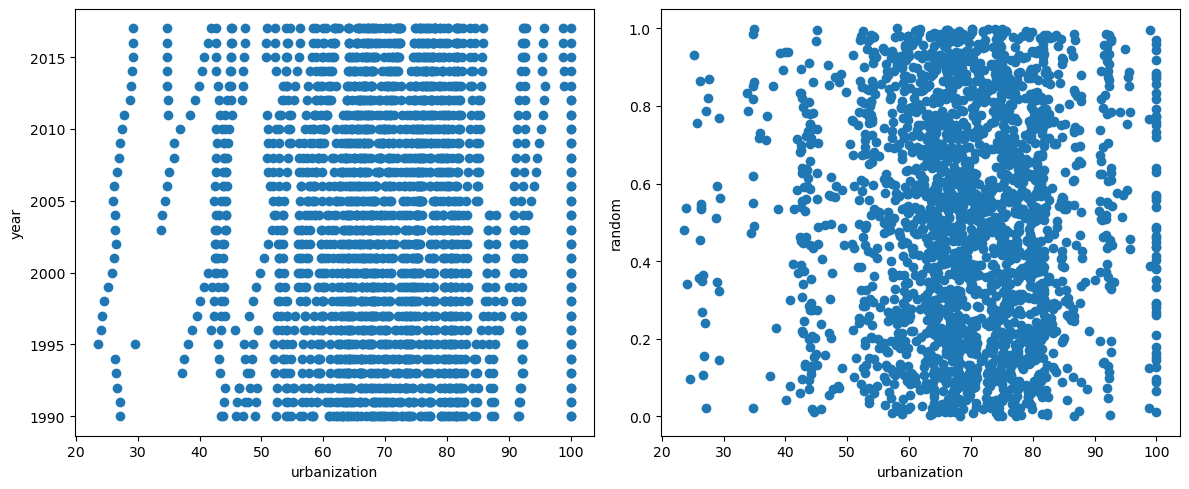

In [240]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['urbanization'], data['year'])
plt.xlabel('urbanization')
plt.ylabel('year')

plt.subplot(1, 2, 2)
plt.scatter(data['urbanization'], data['random'])
plt.xlabel('urbanization')
plt.ylabel('random')
plt.tight_layout()

## 2. Важность признаков

In [243]:
# Преобразование столбца 'year' в булевый на основе целевого признак: year <= 2004
data['year'] = data['year'] <= 2004
data.tail()

,year,npg,birth_rate,death_rate,gdw,urbanization,random
2375,False,-1.3,11.3,12.6,76.63,62.0,0.673061
2376,False,3.7,13.1,9.4,58.23,70.0,0.586945
2377,False,6.4,14.5,8.1,70.10,65.5,0.550993
2378,False,9.1,14.0,4.9,53.57,83.7,0.115315
2379,False,-4.7,10.5,15.2,82.61,81.7,0.913589


In [246]:
# Разделяем выборку на тестовую и на тренеровочные подвыборки
from sklearn.model_selection import train_test_split

# Разбиваем датасет на обучающую и на тестовую выборку в соотношении 80% на 20%
train, test = train_test_split(data, test_size=0.2, random_state=42) # shuffle = True по умолчанию
train

,year,npg,birth_rate,death_rate,gdw,urbanization,random
1499,False,-0.8,11.9,13.1,48.59,76.00,0.665261
2367,False,3.5,14.3,10.8,73.98,65.90,0.168738
1883,False,13.4,19.1,5.7,60.71,45.10,0.627200
1178,True,-4.2,11.5,15.7,60.17,69.72,0.563201
1214,True,0.3,11.9,11.3,66.03,44.20,0.110075
...,...,...,...,...,...,...,...
1693,False,-1.3,13.0,14.4,61.05,81.90,0.384660
1137,True,-7.7,10.3,18.1,68.08,56.37,0.478265
1173,True,-3.6,10.2,13.8,65.67,73.88,0.897785
1341,False,-4.4,10.0,14.2,63.87,56.20,0.090957
